<a href="https://colab.research.google.com/github/YS-JEOUNG/amazon-review-project/blob/main/code/artscrafts_code/artscrafts_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
# array & decompress the file
import numpy as np
import pandas as pd
import gzip

# visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# datetime
from datetime import datetime

# text preprocessing
import spacy
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
!pip install contractions
import contractions
import unicodedata
tokenizer = ToktokTokenizer
nip = spacy.load('en', parse=True, tag=True, entity=True)
from sklearn.feature_extraction.text import CountVectorizer

# warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 286kB 8.0MB/s 
     |████████████████████████████████| 327kB 12.3MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85387 sha256=e55a89f72fa8f6ffc44b79da7df69c85c6806c844adae559369968008fac94aa
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick


# Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/arts_total_cleaned.csv')

In [ ]:
df = df.drop(['date'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130133 entries, 0 to 130132
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   overall           130133 non-null  float64
 1   vote              130133 non-null  int64  
 2   verified          130133 non-null  bool   
 3   reviewer_id       130133 non-null  object 
 4   asin              130133 non-null  object 
 5   style             130133 non-null  object 
 6   reviewer_name     130128 non-null  object 
 7   unix_review_time  130133 non-null  int64  
 8   category          130133 non-null  object 
 9   description       130133 non-null  object 
 10  title             130133 non-null  object 
 11  brand             129770 non-null  object 
 12  rank              130133 non-null  object 
 13  main_cat          129791 non-null  object 
 14  price             115105 non-null  object 
 15  review_text       130133 non-null  object 
 16  rating_class      13

In [ ]:
# import pandas_profiling
# pandas_profiling.ProfileReport(df)
# TypeError: concat() got an unexpected keyword argument 'join_axes'

# Data Analysis

Text(0, 0.5, 'number of reviews')

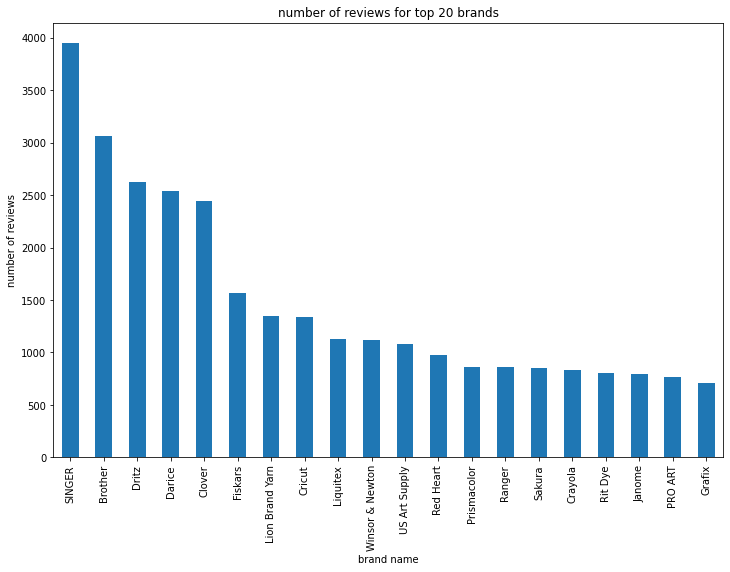

In [ ]:
# plot number of reviews for top 20 brands

brands = df['brand'].value_counts()
plt.figure(figsize=(12, 8))
brands[:20].plot(kind='bar')
plt.title('number of reviews for top 20 brands')
plt.xlabel('brand name')
plt.ylabel('number of reviews')

Text(0, 0.5, 'number of reviews')

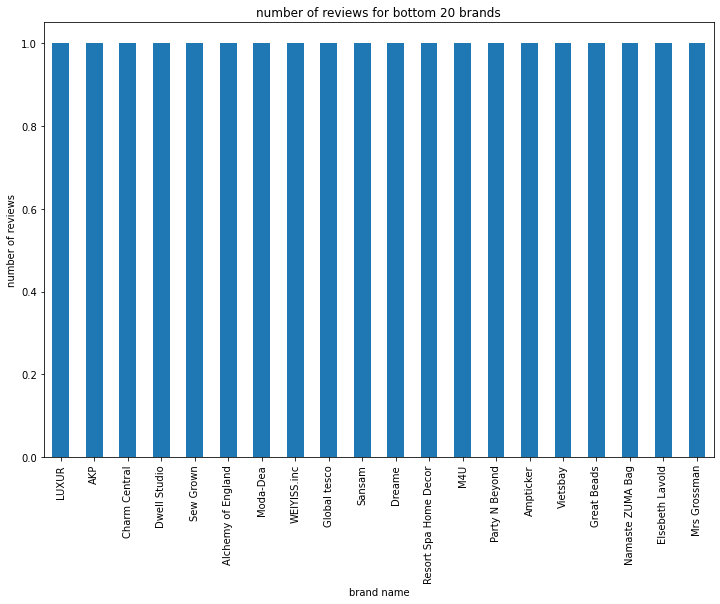

In [ ]:
# plot number of reviews for bottom 20 brands

plt.figure(figsize=(12, 8))
brands[-20:].plot(kind='bar')
plt.title('number of reviews for bottom 20 brands')
plt.xlabel('brand name')
plt.ylabel('number of reviews')

Text(0, 0.5, 'number of reviews')

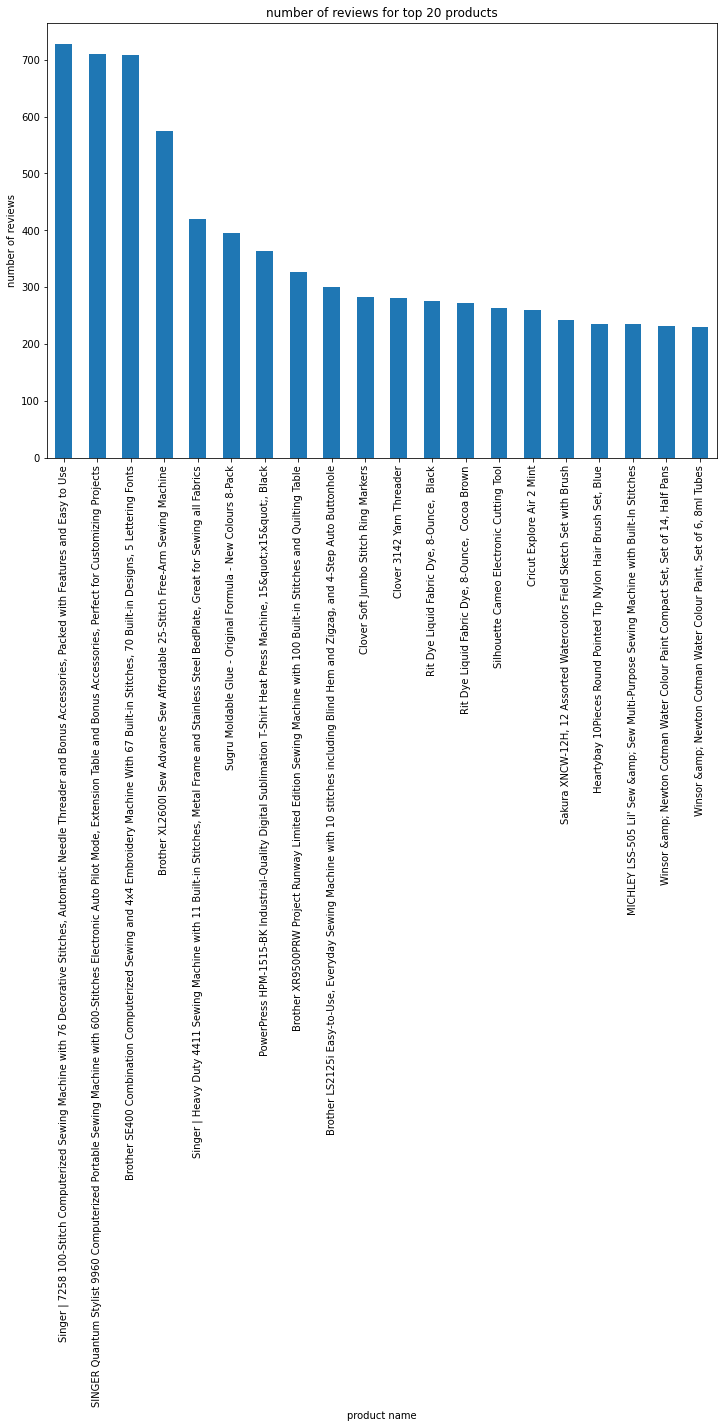

In [ ]:
# plot number of reviews for top 20 products

products = df['title'].value_counts()
plt.figure(figsize=(12, 8))
products[:20].plot(kind='bar')
plt.title('number of reviews for top 20 products')
plt.xlabel('product name')
plt.ylabel('number of reviews')

In [ ]:
df['time'] = pd.to_datetime(df['time'], format = '%Y-%m-%d')

In [ ]:
df['time']

0        2010-11-27
1        2010-03-04
2        2010-02-25
3        2017-07-06
4        2017-06-21
            ...    
130128   2017-01-28
130129   2017-05-26
130130   2016-11-06
130131   2018-01-09
130132   2017-10-09
Name: time, Length: 130133, dtype: datetime64[ns]

In [ ]:
products

Singer | 7258 100-Stitch Computerized Sewing Machine with 76 Decorative Stitches, Automatic Needle Threader and Bonus Accessories, Packed with Features and Easy to Use                   728
SINGER Quantum Stylist 9960 Computerized Portable Sewing Machine with 600-Stitches Electronic Auto Pilot Mode, Extension Table and Bonus Accessories, Perfect for Customizing Projects    710
Brother SE400 Combination Computerized Sewing and 4x4 Embroidery Machine With 67 Built-in Stitches, 70 Built-in Designs, 5 Lettering Fonts                                                708
Brother XL2600I Sew Advance Sew Affordable 25-Stitch Free-Arm Sewing Machine                                                                                                              575
Singer | Heavy Duty 4411 Sewing Machine with 11 Built-in Stitches, Metal Frame and Stainless Steel BedPlate, Great for Sewing all Fabrics                                                 420
                                                  

In [ ]:
# rating and reviews - 임의로 상품 선택
prod420 = df[(df['title'] == 'Singer | Heavy Duty 4411 Sewing Machine with 11 Built-in Stitches, Metal Frame and Stainless Steel BedPlate, Great for Sewing all Fabrics')]
prod420.head()

,overall,vote,verified,reviewer_id,asin,style,reviewer_name,unix_review_time,category,description,title,brand,rank,main_cat,price,review_text,rating_class,time,clean_text
111128,4.0,153,True,A2L28F3Y7JYCWP,B01D3MWPU4,{'Style Name:': ' 4411 Sewing Machine'},DM2,1295136000,"['Arts, Crafts & Sewing', 'Sewing', 'Sewing Ma...","['""The SINGER HEAVY DUTY 4411 sewing machine i...",Singer | Heavy Duty 4411 Sewing Machine with 1...,SINGER,"['>#151 in Arts, Crafts & Sewing (See Top 100 ...","Arts, Crafts & Sewing",$7.67,Fills the Gap I Intended I am a firm believer ...,good,2011-01-16,fill gap intend firm believer get pay expectat...
111129,5.0,27,True,A16O8I9JAHTOSK,B01D3MWPU4,{'Style Name:': ' 4411 Sewing Machine'},Carol Greco,1294963200,"['Arts, Crafts & Sewing', 'Sewing', 'Sewing Ma...","['""The SINGER HEAVY DUTY 4411 sewing machine i...",Singer | Heavy Duty 4411 Sewing Machine with 1...,SINGER,"['>#151 in Arts, Crafts & Sewing (See Top 100 ...","Arts, Crafts & Sewing",$7.67,Very Please with This Purchase Purchased this ...,good,2011-01-14,please purchase purchase christmas gift son co...
111130,4.0,58,True,ASKIVIA1753OI,B01D3MWPU4,{'Style Name:': ' 4411 Sewing Machine'},anoneemus,1294876800,"['Arts, Crafts & Sewing', 'Sewing', 'Sewing Ma...","['""The SINGER HEAVY DUTY 4411 sewing machine i...",Singer | Heavy Duty 4411 Sewing Machine with 1...,SINGER,"['>#151 in Arts, Crafts & Sewing (See Top 100 ...","Arts, Crafts & Sewing",$7.67,"""heavy duty"" is possibly misleading I bought t...",good,2011-01-13,heavy duty possibly mislead buy sew car seat c...
111131,2.0,25,True,A117SS8QNANELR,B01D3MWPU4,{'Style Name:': ' 4411 Sewing Machine'},blunt honesty,1294790400,"['Arts, Crafts & Sewing', 'Sewing', 'Sewing Ma...","['""The SINGER HEAVY DUTY 4411 sewing machine i...",Singer | Heavy Duty 4411 Sewing Machine with 1...,SINGER,"['>#151 in Arts, Crafts & Sewing (See Top 100 ...","Arts, Crafts & Sewing",$7.67,disappointment after large project after a lar...,bad,2011-01-12,disappointment large project large project det...
111132,5.0,211,True,AY4IRPPKDU225,B01D3MWPU4,{'Style Name:': ' 4411 Sewing Machine'},MimiNo1,1294617600,"['Arts, Crafts & Sewing', 'Sewing', 'Sewing Ma...","['""The SINGER HEAVY DUTY 4411 sewing machine i...",Singer | Heavy Duty 4411 Sewing Machine with 1...,SINGER,"['>#151 in Arts, Crafts & Sewing (See Top 100 ...","Arts, Crafts & Sewing",$7.67,LOVE SINGER PRODUCTS Have been sewing since I ...,good,2011-01-10,love singer products sew since years old own s...


In [ ]:
# 해당 상품에 대한 날짜별 별점 해당 상품에 대한 날짜별 별점
date_rate = prod420.groupby(['time'])['overall'].mean()
date_rate

time
2010-11-20    4.0
2011-01-09    4.0
2011-01-10    5.0
2011-01-12    2.0
2011-01-13    4.0
             ... 
2018-05-07    5.0
2018-05-16    5.0
2018-05-22    5.0
2018-05-25    5.0
2018-06-02    2.0
Name: overall, Length: 376, dtype: float64

# Tokenize

In [ ]:
# import sys
# sys.setrecursionlimit(20_000)

# def RegexpTokenizer(Sent):
    # tokenizer = RegexpTokenizer("[\w']+")
    # return tokenizer.tokenize(Sent)

# listwords = []
# for m in prod420['clean_text']:
    # n = RegexpTokenizer(str(m))
    # listwords.append(n)
# print(listwords[10])

# 코랩 자꾸 죽어버림. wordcloud나 시각화 포기하고 일단 tokenize로 넘어감.
# >>>> 해결됨

In [ ]:
# function for creating a column token
def token(text):
    token = [w for w in nltk.word_tokenize(text)]
    return token

# to create token feature
df['token'] = df['clean_text'].apply(token)

In [ ]:
# function for creating a column to see the length of the review text
def length(text):
    length = len([w for w in nltk.word_tokenize(text)])
    return length

# apply length function to create review length feature
df['review_length'] = df['review_text'].apply(length)
df.head()

,overall,vote,verified,reviewer_id,asin,style,reviewer_name,unix_review_time,category,description,title,brand,rank,main_cat,price,review_text,rating_class,time,clean_text,token,review_length
0,5.0,9,True,APVFJYDRTYNK5,886293162X,{'Format:': ' Paperback'},Mrs. Sally L. C. Marsh,1290816000,"['Arts, Crafts & Sewing', 'Crafting', 'Paper &...",['The new Volant Address Book has ruled pages ...,"Moleskine Volant Address Book, Large, Magenta,...",Moleskine,"['>#514,989 in Office Products (See top 100)',...",Office Products,NaN,"Nice and perfect for an address book Thin, you...",good,2010-11-27,nice perfect address book thin could slide dra...,"[nice, perfect, address, book, thin, could, sl...",55
1,4.0,69,True,A3BQSWC3801JNI,8862933177,{'Format:': ' Hardcover'},Stacy A. Jones,1267660800,"['Arts, Crafts & Sewing', 'Crafting', 'Paper &...",['Build your very own film archive. Fully embo...,"Moleskine Passion Journal - Film, Large, Hard ...",Moleskine,"['>#229,441 in Office Products (See top 100)',...",Office Products,$137.58,"Solid buy, few small gripes about page layout ...",good,2010-03-04,solid buy small grip page layout honest alread...,"[solid, buy, small, grip, page, layout, honest...",367
2,5.0,5,True,A1RY2FJR0TVP85,8862933177,{'Format:': ' Hardcover'},N. M. Patterson,1267056000,"['Arts, Crafts & Sewing', 'Crafting', 'Paper &...",['Build your very own film archive. Fully embo...,"Moleskine Passion Journal - Film, Large, Hard ...",Moleskine,"['>#229,441 in Office Products (See top 100)',...",Office Products,$137.58,Cool place to Catalog Your Recipes I purchased...,good,2010-02-25,cool place catalog recipes purchase recipe jou...,"[cool, place, catalog, recipes, purchase, reci...",142
3,2.0,2,True,A12GULZW3W4W3P,8862933177,{'Format:': ' Hardcover'},Jazz,1499299200,"['Arts, Crafts & Sewing', 'Crafting', 'Paper &...",['Build your very own film archive. Fully embo...,"Moleskine Passion Journal - Film, Large, Hard ...",Moleskine,"['>#229,441 in Office Products (See top 100)',...",Office Products,$137.58,Its ok read for specifications I did not like ...,bad,2017-07-06,ok read specifications not like really like mo...,"[ok, read, specifications, not, like, really, ...",226
4,5.0,2,True,A2G1BD6F2WR4YW,8862933177,{'Format:': ' Hardcover'},rrobey619,1498003200,"['Arts, Crafts & Sewing', 'Crafting', 'Paper &...",['Build your very own film archive. Fully embo...,"Moleskine Passion Journal - Film, Large, Hard ...",Moleskine,"['>#229,441 in Office Products (See top 100)',...",Office Products,$137.58,Great for Chefs. I'm a chef and I was looking ...,good,2017-06-21,great chefs chef look book jot quick ideas ins...,"[great, chefs, chef, look, book, jot, quick, i...",44


In [ ]:
# review_length 최댓값 확인
df['review_length'].sort_values()

40117        2
107097       2
102127       2
68288        2
77176        2
          ... 
84743     2651
78092     2836
91825     2873
58084     3927
16139     4280
Name: review_length, Length: 130133, dtype: int64

In [ ]:
# create review length bin feature
df['review_length_bin'] = pd.cut(df['review_length'], np.arange(0, 4300, 100))
df.head()

,overall,vote,verified,reviewer_id,asin,style,reviewer_name,unix_review_time,category,description,title,brand,rank,main_cat,price,review_text,rating_class,time,clean_text,token,review_length,review_length_bin
0,5.0,9,True,APVFJYDRTYNK5,886293162X,{'Format:': ' Paperback'},Mrs. Sally L. C. Marsh,1290816000,"['Arts, Crafts & Sewing', 'Crafting', 'Paper &...",['The new Volant Address Book has ruled pages ...,"Moleskine Volant Address Book, Large, Magenta,...",Moleskine,"['>#514,989 in Office Products (See top 100)',...",Office Products,NaN,"Nice and perfect for an address book Thin, you...",good,2010-11-27,nice perfect address book thin could slide dra...,"[nice, perfect, address, book, thin, could, sl...",55,"(0, 100]"
1,4.0,69,True,A3BQSWC3801JNI,8862933177,{'Format:': ' Hardcover'},Stacy A. Jones,1267660800,"['Arts, Crafts & Sewing', 'Crafting', 'Paper &...",['Build your very own film archive. Fully embo...,"Moleskine Passion Journal - Film, Large, Hard ...",Moleskine,"['>#229,441 in Office Products (See top 100)',...",Office Products,$137.58,"Solid buy, few small gripes about page layout ...",good,2010-03-04,solid buy small grip page layout honest alread...,"[solid, buy, small, grip, page, layout, honest...",367,"(300, 400]"
2,5.0,5,True,A1RY2FJR0TVP85,8862933177,{'Format:': ' Hardcover'},N. M. Patterson,1267056000,"['Arts, Crafts & Sewing', 'Crafting', 'Paper &...",['Build your very own film archive. Fully embo...,"Moleskine Passion Journal - Film, Large, Hard ...",Moleskine,"['>#229,441 in Office Products (See top 100)',...",Office Products,$137.58,Cool place to Catalog Your Recipes I purchased...,good,2010-02-25,cool place catalog recipes purchase recipe jou...,"[cool, place, catalog, recipes, purchase, reci...",142,"(100, 200]"
3,2.0,2,True,A12GULZW3W4W3P,8862933177,{'Format:': ' Hardcover'},Jazz,1499299200,"['Arts, Crafts & Sewing', 'Crafting', 'Paper &...",['Build your very own film archive. Fully embo...,"Moleskine Passion Journal - Film, Large, Hard ...",Moleskine,"['>#229,441 in Office Products (See top 100)',...",Office Products,$137.58,Its ok read for specifications I did not like ...,bad,2017-07-06,ok read specifications not like really like mo...,"[ok, read, specifications, not, like, really, ...",226,"(200, 300]"
4,5.0,2,True,A2G1BD6F2WR4YW,8862933177,{'Format:': ' Hardcover'},rrobey619,1498003200,"['Arts, Crafts & Sewing', 'Crafting', 'Paper &...",['Build your very own film archive. Fully embo...,"Moleskine Passion Journal - Film, Large, Hard ...",Moleskine,"['>#229,441 in Office Products (See top 100)',...",Office Products,$137.58,Great for Chefs. I'm a chef and I was looking ...,good,2017-06-21,great chefs chef look book jot quick ideas ins...,"[great, chefs, chef, look, book, jot, quick, i...",44,"(0, 100]"


In [ ]:
# good rating percentages for each length bin with 50's
df['rating_class_num'] = df['rating_class'].map({'good': 1, 'bad': 0})
per_pos_length = df.groupby(['review_length_bin'])['rating_class_num'].mean()
df['review_length_bin'] = df.review_length_bin.astype(str)
per_pos_length = per_pos_length*100
per_pos_length

review_length_bin
(0, 100]         78.014018
(100, 200]       79.662351
(200, 300]       82.618648
(300, 400]       85.367965
(400, 500]       86.526946
(500, 600]       85.909980
(600, 700]       86.496350
(700, 800]       83.428571
(800, 900]       83.333333
(900, 1000]      87.755102
(1000, 1100]     94.594595
(1100, 1200]     82.352941
(1200, 1300]     89.473684
(1300, 1400]     93.333333
(1400, 1500]     87.500000
(1500, 1600]    100.000000
(1600, 1700]    100.000000
(1700, 1800]    100.000000
(1800, 1900]     50.000000
(1900, 2000]    100.000000
(2000, 2100]    100.000000
(2100, 2200]    100.000000
(2200, 2300]    100.000000
(2300, 2400]     66.666667
(2400, 2500]           NaN
(2500, 2600]    100.000000
(2600, 2700]     50.000000
(2700, 2800]           NaN
(2800, 2900]    100.000000
(2900, 3000]           NaN
(3000, 3100]           NaN
(3100, 3200]           NaN
(3200, 3300]           NaN
(3300, 3400]           NaN
(3400, 3500]           NaN
(3500, 3600]           NaN
(3600, 370

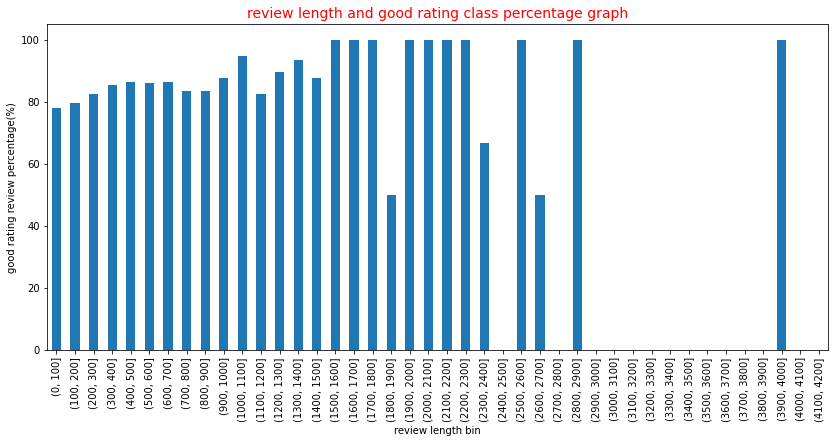

In [ ]:
# plot the graph for good rating class percentage and review length bin
plt.figure(figsize = (14, 6))
per_pos_length.plot(kind='bar')
plt.title('review length and good rating class percentage graph', color='r', size=14)
plt.xlabel('review length bin')
plt.ylabel('good rating review percentage(%)')
plt.show()

# 파일 저장

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/project/arts_tokenized.csv', sep=',', encoding='utf-8', index=False)

# Visualization

In [ ]:
from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

## 낮은 별점 분석

In [ ]:
### 밑의 반복되는 코드를 아예 함수로 만들면 좋을 듯
### 일단 야매로 해보겠음
prod420_low = prod420[(prod420['overall'] < 3)]
prod420_low

,overall,vote,verified,reviewer_id,asin,style,reviewer_name,unix_review_time,category,description,title,brand,rank,main_cat,price,review_text,rating_class,time,clean_text
111131,2.0,25,True,A117SS8QNANELR,B01D3MWPU4,{'Style Name:': ' 4411 Sewing Machine'},blunt honesty,1294790400,"['Arts, Crafts & Sewing', 'Sewing', 'Sewing Ma...","['""The SINGER HEAVY DUTY 4411 sewing machine i...",Singer | Heavy Duty 4411 Sewing Machine with 1...,SINGER,"['>#151 in Arts, Crafts & Sewing (See Top 100 ...","Arts, Crafts & Sewing",$7.67,disappointment after large project after a lar...,bad,2011-01-12,disappointment large project large project det...
111135,2.0,2,True,A93HG6NMU2ZQO,B01D3MWPU4,{'Style Name:': ' 4411 Sewing Machine'},Helen Frances,1527897600,"['Arts, Crafts & Sewing', 'Sewing', 'Sewing Ma...","['""The SINGER HEAVY DUTY 4411 sewing machine i...",Singer | Heavy Duty 4411 Sewing Machine with 1...,SINGER,"['>#151 in Arts, Crafts & Sewing (See Top 100 ...","Arts, Crafts & Sewing",$7.67,Not Useful This machine is a huge disappointme...,bad,2018-06-02,not useful machine huge disappointment get say...
111141,2.0,3,False,A1PVLHHMDX51,B01D3MWPU4,{'Style Name:': ' 4411 Sewing Machine'},M. Williams,1512777600,"['Arts, Crafts & Sewing', 'Sewing', 'Sewing Ma...","['""The SINGER HEAVY DUTY 4411 sewing machine i...",Singer | Heavy Duty 4411 Sewing Machine with 1...,SINGER,"['>#151 in Arts, Crafts & Sewing (See Top 100 ...","Arts, Crafts & Sewing",$7.67,I liked this machine at first I liked this mac...,bad,2017-12-09,like machine first like machine first two year...
111142,1.0,2,True,A2D8POZXZFDVZR,B01D3MWPU4,{'Style Name:': ' 4411 Sewing Machine'},AYRM,1512604800,"['Arts, Crafts & Sewing', 'Sewing', 'Sewing Ma...","['""The SINGER HEAVY DUTY 4411 sewing machine i...",Singer | Heavy Duty 4411 Sewing Machine with 1...,SINGER,"['>#151 in Arts, Crafts & Sewing (See Top 100 ...","Arts, Crafts & Sewing",$7.67,The motor died after 3 days of owning it. ... ...,bad,2017-12-07,motor die days own motor die days own use hour...
111146,2.0,3,True,A1I8N5NDFWV3JK,B01D3MWPU4,{'Style Name:': ' 4411 Sewing Machine'},T. Kinder,1501200000,"['Arts, Crafts & Sewing', 'Sewing', 'Sewing Ma...","['""The SINGER HEAVY DUTY 4411 sewing machine i...",Singer | Heavy Duty 4411 Sewing Machine with 1...,SINGER,"['>#151 in Arts, Crafts & Sewing (See Top 100 ...","Arts, Crafts & Sewing",$7.67,I would like to speak to amazon about replacin...,bad,2017-07-28,would like speak amazon replace product machin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111519,1.0,68,True,A2CY5DF5YBTUAO,B01D3MWPU4,{'Style Name:': ' 4411 Sewing Machine'},B Herendeen,1323302400,"['Arts, Crafts & Sewing', 'Sewing', 'Sewing Ma...","['""The SINGER HEAVY DUTY 4411 sewing machine i...",Singer | Heavy Duty 4411 Sewing Machine with 1...,SINGER,"['>#151 in Arts, Crafts & Sewing (See Top 100 ...","Arts, Crafts & Sewing",$7.67,"DON'T BUY IT! I am FORCED to rate one star, it...",bad,2011-12-08,not buy force rate one star not even deserve o...
111522,1.0,70,True,A1E0D1UN3TGRAL,B01D3MWPU4,{'Style Name:': ' 4411 Sewing Machine'},dextermcclane,1317772800,"['Arts, Crafts & Sewing', 'Sewing', 'Sewing Ma...","['""The SINGER HEAVY DUTY 4411 sewing machine i...",Singer | Heavy Duty 4411 Sewing Machine with 1...,SINGER,"['>#151 in Arts, Crafts & Sewing (See Top 100 ...","Arts, Crafts & Sewing",$7.67,Do not buy this machine I purchased this produ...,bad,2011-10-05,not buy machine purchase product come decent p...
111525,2.0,5,True,A3M40G5XKBXR39,B01D3MWPU4,{'Style Name:': ' 4411 Sewing Machine'},PAM,1313971200,"['Arts, Crafts & Sewing', 'Sewing', 'Sewing Ma...","['""The SINGER HEAVY DUTY 4411 sewing machine i...",Singer | Heavy Duty 4411 Sewing Machine with 1...,SINGER,"['>#151 in Arts, Crafts & Sewing (See Top 100 ...","Arts, Crafts & Sewing",$7.67,HEAVY DUTY MY FOOT My husband bought me this m...,bad,2011-08-22,heavy duty foot husband buy machine december a...
111534,1.0,118,False,A29HB3E1

In [ ]:
ListWords = []
for m in prod420_low['clean_text']:
    n = RegExpTokenizer(str(m))
    ListWords.append(n)
print(ListWords[10])

# All words
from nltk import FreqDist
def Bag_Of_Words(ListWords):
    all_words = []
    for m in ListWords:
        for w in m:
            all_words.append(w.lower())
    all_words1 = FreqDist(all_words)
    return all_words1

['dead', 'bobbin', 'guess', 'problehem', 'read', 'many', 'review', 'no', 'one', 'mention', 'bobbin', 'problehems', 'could', 'no', 'initiate', 'thread', 'bobbin', 'catch', 'needle', 'no', 'matter', 'two', 'three', 'hours', 'bobbin', 'defunct', 'six', 'weeks', 'late', 'return', 'shock', 'double', 'check', 'first', 'major', 'disappointment', 'amazon', 'cest', 'domage', 'recommend', 'check', 'machine', 'soon', 'possible', 'delivery']


1463


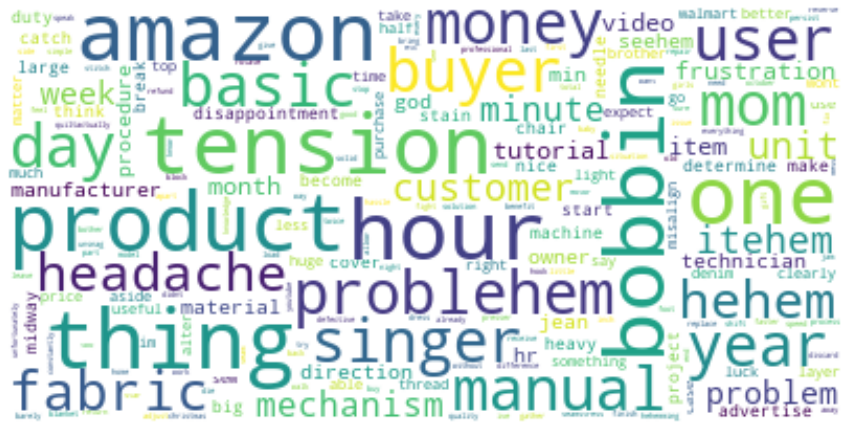

In [ ]:
import matplotlib.pyplot as plt
all_words2 = Bag_Of_Words(ListWords)
ax = plt.figure(figsize=(15, 10))

# generate a word cloud image
wordcloud = WordCloud(background_color='white', max_font_size=40).generate(' '.join(all_words2.keys()))

# display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
print(len(all_words2))

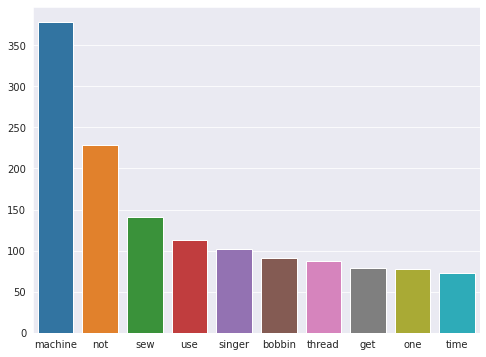

In [ ]:
plt.figure(figsize=(8, 6))
import seaborn as sns
from sklearn.manifold import TSNE
count = []
words = []
for w in all_words2.most_common(10):
    count.append(w[1])
    words.append(w[0])
sns.set_style('darkgrid')
sns.barplot(words, count)

## 높은 별점 분석

In [ ]:
prod420_high = prod420[(prod420['overall'] >= 3)]
prod420_high

,overall,vote,verified,reviewer_id,asin,style,reviewer_name,unix_review_time,category,description,title,brand,rank,main_cat,price,review_text,rating_class,time,clean_text
111128,4.0,153,True,A2L28F3Y7JYCWP,B01D3MWPU4,{'Style Name:': ' 4411 Sewing Machine'},DM2,1295136000,"['Arts, Crafts & Sewing', 'Sewing', 'Sewing Ma...","['""The SINGER HEAVY DUTY 4411 sewing machine i...",Singer | Heavy Duty 4411 Sewing Machine with 1...,SINGER,"['>#151 in Arts, Crafts & Sewing (See Top 100 ...","Arts, Crafts & Sewing",$7.67,Fills the Gap I Intended I am a firm believer ...,good,2011-01-16,fill gap intend firm believer get pay expectat...
111129,5.0,27,True,A16O8I9JAHTOSK,B01D3MWPU4,{'Style Name:': ' 4411 Sewing Machine'},Carol Greco,1294963200,"['Arts, Crafts & Sewing', 'Sewing', 'Sewing Ma...","['""The SINGER HEAVY DUTY 4411 sewing machine i...",Singer | Heavy Duty 4411 Sewing Machine with 1...,SINGER,"['>#151 in Arts, Crafts & Sewing (See Top 100 ...","Arts, Crafts & Sewing",$7.67,Very Please with This Purchase Purchased this ...,good,2011-01-14,please purchase purchase christmas gift son co...
111130,4.0,58,True,ASKIVIA1753OI,B01D3MWPU4,{'Style Name:': ' 4411 Sewing Machine'},anoneemus,1294876800,"['Arts, Crafts & Sewing', 'Sewing', 'Sewing Ma...","['""The SINGER HEAVY DUTY 4411 sewing machine i...",Singer | Heavy Duty 4411 Sewing Machine with 1...,SINGER,"['>#151 in Arts, Crafts & Sewing (See Top 100 ...","Arts, Crafts & Sewing",$7.67,"""heavy duty"" is possibly misleading I bought t...",good,2011-01-13,heavy duty possibly mislead buy sew car seat c...
111132,5.0,211,True,AY4IRPPKDU225,B01D3MWPU4,{'Style Name:': ' 4411 Sewing Machine'},MimiNo1,1294617600,"['Arts, Crafts & Sewing', 'Sewing', 'Sewing Ma...","['""The SINGER HEAVY DUTY 4411 sewing machine i...",Singer | Heavy Duty 4411 Sewing Machine with 1...,SINGER,"['>#151 in Arts, Crafts & Sewing (See Top 100 ...","Arts, Crafts & Sewing",$7.67,LOVE SINGER PRODUCTS Have been sewing since I ...,good,2011-01-10,love singer products sew since years old own s...
111133,4.0,30,True,A19509YBOBYL0A,B01D3MWPU4,{'Style Name:': ' 4411 Sewing Machine'},Regina L. Markowicz,1294531200,"['Arts, Crafts & Sewing', 'Sewing', 'Sewing Ma...","['""The SINGER HEAVY DUTY 4411 sewing machine i...",Singer | Heavy Duty 4411 Sewing Machine with 1...,SINGER,"['>#151 in Arts, Crafts & Sewing (See Top 100 ...","Arts, Crafts & Sewing",$7.67,"Sturdy, basic, reliable, good for heavy home u...",good,2011-01-09,sturdy basic reliable good heavy home use not ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111542,4.0,2,True,A28JPKB51EDEBO,B01D3MWPU4,{'Style Name:': ' 4411 Sewing Machine'},R. Page,1298937600,"['Arts, Crafts & Sewing', 'Sewing', 'Sewing Ma...","['""The SINGER HEAVY DUTY 4411 sewing machine i...",Singer | Heavy Duty 4411 Sewing Machine with 1...,SINGER,"['>#151 in Arts, Crafts & Sewing (See Top 100 ...","Arts, Crafts & Sewing",$7.67,Singer Heavy Duty 4411 I've been using it off ...,good,2011-03-01,singer heavy duty use since receive purchase m...
111543,3.0,875,True,ANHK9I8O7ZH5R,B01D3MWPU4,{'Style Name:': ' 4411 Sewing Machine'},Kindle Customer,1297987200,"['Arts, Crafts & Sewing', 'Sewing', 'Sewing Ma...","['""The SINGER HEAVY DUTY 4411 sewing machine i...",Singer | Heavy Duty 4411 Sewing Machine with 1...,SINGER,"['>#151 in Arts, Crafts & Sewing (See Top 100 ...","Arts, Crafts & Sewing",$7.67,Singer 4411 I am a self employed seamstress an...,good,2011-02-18,singer self ehemployed seamstress hard machine...
111544,4.0,63,True,A1WIFZ5BY1VKR8,B01D3MWPU4,{'Style Name:': ' 4411 Sewing Machine'},Roy,1296518400,"['Arts, Crafts & Sewing', 'Sewing', 'Sewing Ma...","['""The SINGER HEAVY DUTY 4411 sewing machine i...",Singer | Heavy Duty 4411 Sewing Machine with 1...,SINGER,"['>#151 in Arts, Crafts & Sewing (See Top 100 ...","Arts, Crafts & Sewing",$7.67,4411 Seems to be a Solid Performer... I bought...,good,2011-02-01,seem solid performer buy use singer fashion ma...
111545,4.0,343

In [ ]:
ListWords = []
for m in prod420_high['clean_text']:
    n = RegExpTokenizer(str(m))
    ListWords.append(n)
print(ListWords[10])

# All words
from nltk import FreqDist
def Bag_Of_Words(ListWords):
    all_words = []
    for m in ListWords:
        for w in m:
            all_words.append(w.lower())
    all_words3 = FreqDist(all_words)
    return all_words3

['straight', 'stitch', 'not', 'straight', 'machine', 'look', 'nice', 'could', 'not', 'get', 'produce', 'actual', 'straight', 'stitch', 'use', 'right', 'settings', 'call', 'customer', 'service', 'stitch', 'line', 'still', 'slant', 'stitch', 'overall', 'straight', 'stitch', 'slant', 'right', 'leave', 'leave', 'right', 'customer', 'service', 'rep', 'tell', 'us', 'not', 'know', 'wrong', 'probably', 'return', 'go']


2534


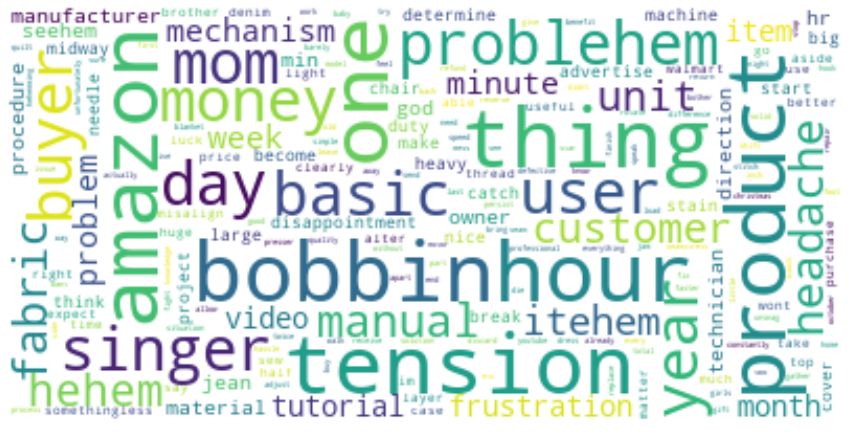

In [ ]:
all_words3 = Bag_Of_Words(ListWords)
ax = plt.figure(figsize=(15, 10))

# generate a word cloud image
wordcloud = WordCloud(background_color='white', max_font_size=40).generate(' '.join(all_words2.keys()))

# display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
print(len(all_words3))

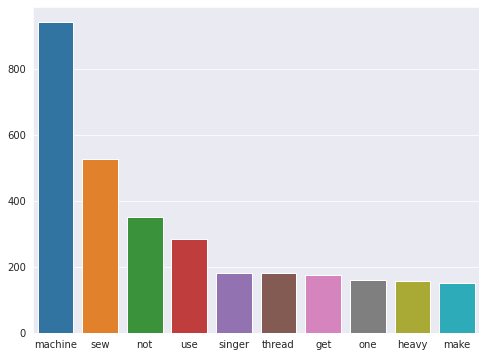

In [ ]:
plt.figure(figsize=(8, 6))
import seaborn as sns
from sklearn.manifold import TSNE
count = []
words = []
for w in all_words3.most_common(10):
    count.append(w[1])
    words.append(w[0])
sns.set_style('darkgrid')
sns.barplot(words, count)

## 기타분석

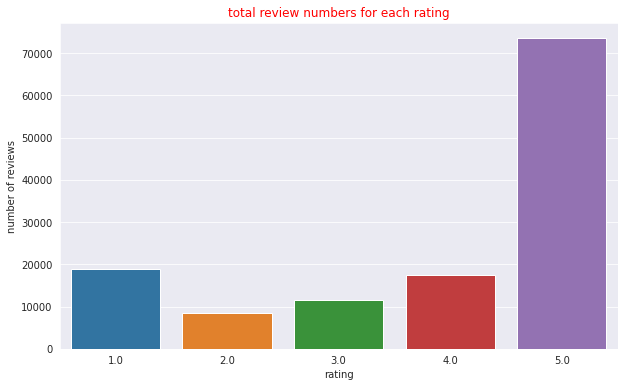

5.0    73561
1.0    18995
4.0    17441
3.0    11598
2.0     8538
Name: overall, dtype: int64

In [ ]:
# total numbers of ratings for each rating
plt.figure(figsize=(10, 6))
sns.countplot(df['overall'])
plt.title('total review numbers for each rating', color='r')
plt.xlabel('rating')
plt.ylabel('number of reviews')
plt.show()

# customer totals for each rating class
df['overall'].value_counts()

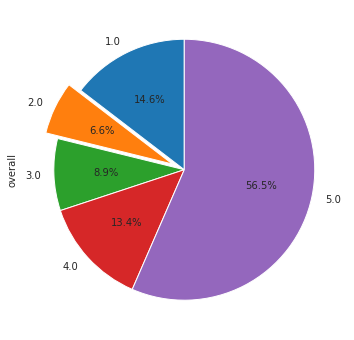

In [ ]:
%matplotlib inline
plt.figure(figsize=(10, 6))
df.groupby('overall').overall.count()
df.groupby('overall').overall.count().plot(kind='pie',autopct='%1.1f%%',startangle=90,explode=(0,0.1,0,0,0))

In [ ]:
word_count = []
for s1 in df.review_text:
    word_count.append(len(str(s1).split()))

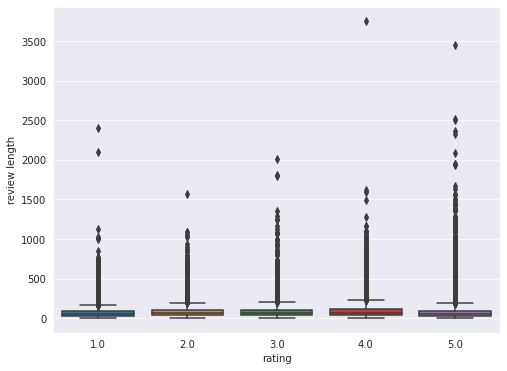

In [ ]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='overall', y=word_count, data=df)
plt.xlabel('rating')
plt.ylabel('review length')
plt.show()

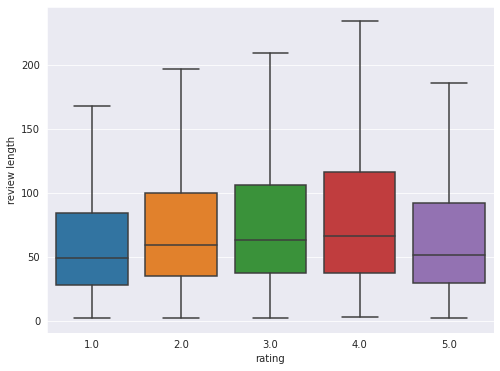

In [ ]:
# remove the outliers
plt.figure(figsize=(8, 6))

sns.boxplot(x='overall', y=word_count, data=df, showfliers=False)
plt.xlabel('rating')
plt.ylabel('review length')
plt.show()

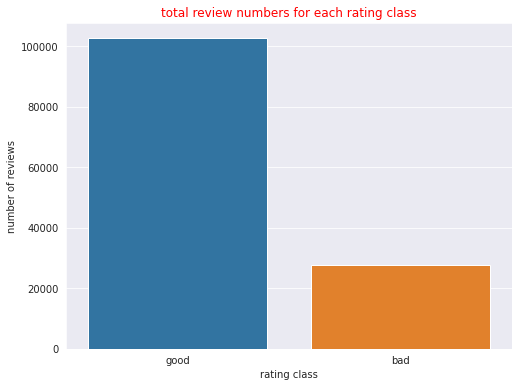

good    102600
bad      27533
Name: rating_class, dtype: int64

In [ ]:
# total review numbers for each rating class
plt.figure(figsize=(8, 6))
sns.countplot(df['rating_class'])
plt.title('total review numbers for each rating class', color='r')
plt.xlabel('rating class')
plt.ylabel('number of reviews')
plt.show()

# customer totals for each rating class
df['rating_class'].value_counts()

In [ ]:
# create 'year' column
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df_year = df.drop('time', axis=1)
df_year.head()

,overall,vote,verified,reviewer_id,asin,style,reviewer_name,unix_review_time,category,description,title,brand,rank,main_cat,price,review_text,rating_class,clean_text,token,review_length,review_length_bin,rating_class_num,year
0,5.0,9,True,APVFJYDRTYNK5,886293162X,{'Format:': ' Paperback'},Mrs. Sally L. C. Marsh,1290816000,"['Arts, Crafts & Sewing', 'Crafting', 'Paper &...",['The new Volant Address Book has ruled pages ...,"Moleskine Volant Address Book, Large, Magenta,...",Moleskine,"['>#514,989 in Office Products (See top 100)',...",Office Products,NaN,"Nice and perfect for an address book Thin, you...",good,nice perfect address book thin could slide dra...,"[nice, perfect, address, book, thin, could, sl...",55,"(0.0, 100.0]",1,2010
1,4.0,69,True,A3BQSWC3801JNI,8862933177,{'Format:': ' Hardcover'},Stacy A. Jones,1267660800,"['Arts, Crafts & Sewing', 'Crafting', 'Paper &...",['Build your very own film archive. Fully embo...,"Moleskine Passion Journal - Film, Large, Hard ...",Moleskine,"['>#229,441 in Office Products (See top 100)',...",Office Products,$137.58,"Solid buy, few small gripes about page layout ...",good,solid buy small grip page layout honest alread...,"[solid, buy, small, grip, page, layout, honest...",367,"(300.0, 400.0]",1,2010
2,5.0,5,True,A1RY2FJR0TVP85,8862933177,{'Format:': ' Hardcover'},N. M. Patterson,1267056000,"['Arts, Crafts & Sewing', 'Crafting', 'Paper &...",['Build your very own film archive. Fully embo...,"Moleskine Passion Journal - Film, Large, Hard ...",Moleskine,"['>#229,441 in Office Products (See top 100)',...",Office Products,$137.58,Cool place to Catalog Your Recipes I purchased...,good,cool place catalog recipes purchase recipe jou...,"[cool, place, catalog, recipes, purchase, reci...",142,"(100.0, 200.0]",1,2010
3,2.0,2,True,A12GULZW3W4W3P,8862933177,{'Format:': ' Hardcover'},Jazz,1499299200,"['Arts, Crafts & Sewing', 'Crafting', 'Paper &...",['Build your very own film archive. Fully embo...,"Moleskine Passion Journal - Film, Large, Hard ...",Moleskine,"['>#229,441 in Office Products (See top 100)',...",Office Products,$137.58,Its ok read for specifications I did not like ...,bad,ok read specifications not like really like mo...,"[ok, read, specifications, not, like, really, ...",226,"(200.0, 300.0]",0,2017
4,5.0,2,True,A2G1BD6F2WR4YW,8862933177,{'Format:': ' Hardcover'},rrobey619,1498003200,"['Arts, Crafts & Sewing', 'Crafting', 'Paper &...",['Build your very own film archive. Fully embo...,"Moleskine Passion Journal - Film, Large, Hard ...",Moleskine,"['>#229,441 in Office Products (See top 100)',...",Office Products,$137.58,Great for Chefs. I'm a chef and I was looking ...,good,great chefs chef look book jot quick ideas ins...,"[great, chefs, chef, look, book, jot, quick, i...",44,"(0.0, 100.0]",1,2017


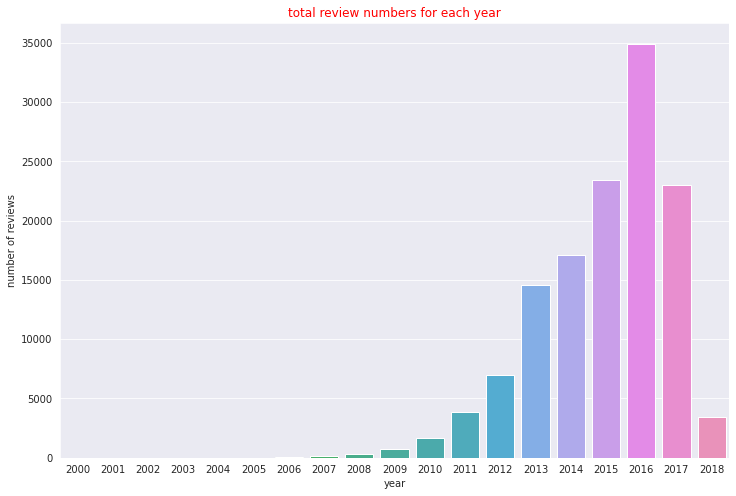

2016    34913
2015    23377
2017    23010
2014    17115
2013    14528
2012     6988
2011     3859
2018     3420
2010     1700
2009      736
2008      287
2007      150
2006       31
2005        7
2003        4
2001        4
2004        2
2002        1
2000        1
Name: year, dtype: int64

In [ ]:
# total review for every year
plt.figure(figsize=(12, 8))
sns.countplot(df['year'])
plt.title('total review numbers for each year', color='r')
plt.xlabel('year')
plt.ylabel('number of reviews')
plt.show()

# customer totals for each rating class
df['year'].value_counts()

In [ ]:
# How many unique customers do we have in the dataset?
print(f'number of unique customers: {len(df.reviewer_id.unique())}')

number of unique customers: 111107


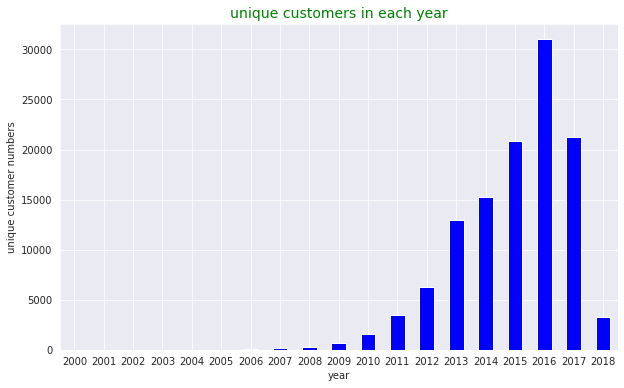

year
2000        1
2001        4
2002        1
2003        4
2004        2
2005        7
2006       31
2007      149
2008      269
2009      670
2010     1561
2011     3496
2012     6293
2013    13001
2014    15244
2015    20827
2016    31023
2017    21226
2018     3313
Name: reviewer_id, dtype: int64


In [ ]:
# How many unique customers in each year?
unique_cust = df.groupby('year')['reviewer_id'].nunique()

# visualize
plt.figure(figsize=(10, 6))
unique_cust.plot(kind='bar', rot=0, color='b')
plt.title('unique customers in each year', color='g', size=14)
plt.xlabel('year')
plt.ylabel('unique customer numbers')
plt.show()

print(unique_cust)

In [ ]:
# how many unique customers do we have in each rating class?

# unique customers for each rating class
a = list(df.groupby(['rating_class'])['reviewer_id'].unique())

# number of customers
a2 = [len(a[0]), len(a[1])]

# number of reviews for each rating class
b = list(df['rating_class'].value_counts())

uniq_cust_rate = pd.DataFrame({'rating_class': ['bad', 'good'],
                               'number_of_customers': a2,
                               'number_of_reviews': sorted(b)})
print(uniq_cust_rate)

  rating_class  number_of_customers  number_of_reviews
0          bad                26137              27533
1         good                86943             102600


In [ ]:
# number of unique products
print(f'number of unique products: {len(df.asin.unique())}')

number of unique products: 14060


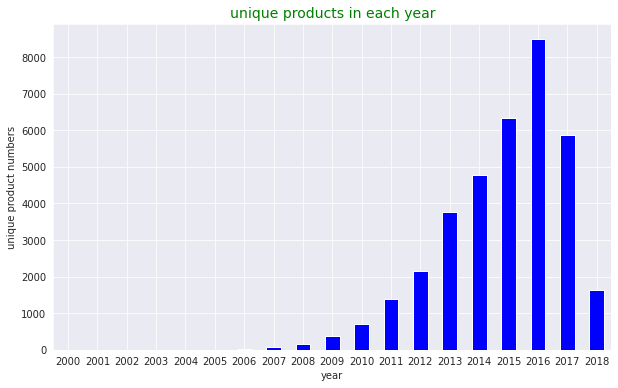

year
2000       1
2001       3
2002       1
2003       2
2004       2
2005       7
2006      21
2007      77
2008     166
2009     388
2010     716
2011    1385
2012    2142
2013    3778
2014    4776
2015    6332
2016    8491
2017    5868
2018    1624
Name: asin, dtype: int64


In [ ]:
# How many unique products in each year?
unique_prod = df.groupby('year')['asin'].nunique()

# plot unique product numbers in each year
plt.figure(figsize=(10, 6))
unique_prod.plot(kind='bar', color='b', rot=0)
plt.title('unique products in each year', color='g', size=14)
plt.xlabel('year')
plt.ylabel('unique product numbers')
plt.show()

print(unique_prod)

In [ ]:
# helpfulness ratio를 사용한 리뷰 길이 분석은 vote 많은 순으로 20개 분석 이런 식으로 해야 할 듯.
# 일단 패스

Text(0, 0.5, 'number of reviews')

<Figure size 1080x576 with 0 Axes>

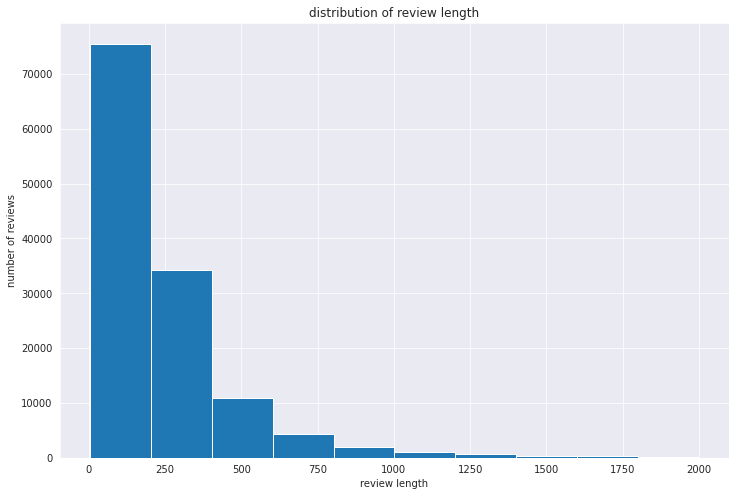

In [ ]:
# plot distribution of review length
plt.figure(figsize=(15, 8))

review_length = df['clean_text'].dropna().map(lambda x: len(x))
plt.figure(figsize=(12, 8))
review_length.loc[review_length < 2000].hist()
plt.title('distribution of review length')
plt.xlabel('review length')
plt.ylabel('number of reviews')

In [ ]:
# how do the rating classes change for each year?
# create a dataframe which shows the relationship between review numbers and rating classes for each year
#### 깃허브에 나와있는 방식이 어려워서 야매로 만듦

feature = df.groupby('year').agg({'rating_class_num': ['size', 'sum', 'mean']})
feature_columns = [' '.join(col).strip() for col in feature.columns.values]
feature = feature.reset_index()
feature['total_reviews'] = feature['rating_class_num']['size']
feature['relevant_rating_number'] = feature['rating_class_num']['sum']
feature['rating_class_num_mean'] = feature['rating_class_num']['mean']*100
feature['total_percentage'] = (feature['relevant_rating_number'] / 130133)*100
feature

year rating_class_num  ... rating_class_num_mean total_percentage
                     size  ...                                       
0   2000                1  ...            100.000000         0.000768
1   2001                4  ...            100.000000         0.003074
2   2002                1  ...            100.000000         0.000768
3   2003                4  ...             75.000000         0.002305
4   2004                2  ...            100.000000         0.001537
5   2005                7  ...            100.000000         0.005379
6   2006               31  ...             90.322581         0.021516
7   2007              150  ...             88.666667         0.102203
8   2008              287  ...             85.365854         0.188269
9   2009              736  ...             85.461957         0.483352
10  2010             1700  ...             85.529412         1.117318
11  2011             3859  ...             83.285825         2.469781
12  2012             6988  ...             81.482541         4.375524
13  2013            14528  ...             82.571586         9.218261
14  2014            17115  ...             79.392346        10.441625
15  2015            23377  ...             76.990204        13.830466
16  2016            34913  ...             79.463237        21.318958
17  2017            23010  ...             75.810517        13.404747
18  2018             3420  ...             70.643275         1.856562

[19 rows x 8 columns]

In [ ]:
feature = feature.drop(['rating_class_num'], axis=1)

In [ ]:
feature

,year,total_reviews,relevant_rating_number,rating_class_num_mean,total_percentage
,,,,,
0,2000,1,1,100.000000,0.000768
1,2001,4,4,100.000000,0.003074
2,2002,1,1,100.000000,0.000768
3,2003,4,3,75.000000,0.002305
4,2004,2,2,100.000000,0.001537
5,2005,7,7,100.000000,0.005379
6,2006,31,28,90.322581,0.021516
7,2007,150,133,88.666667,0.102203
8,2008,287,245,85.365854,0.188269


<Figure size 864x576 with 0 Axes>

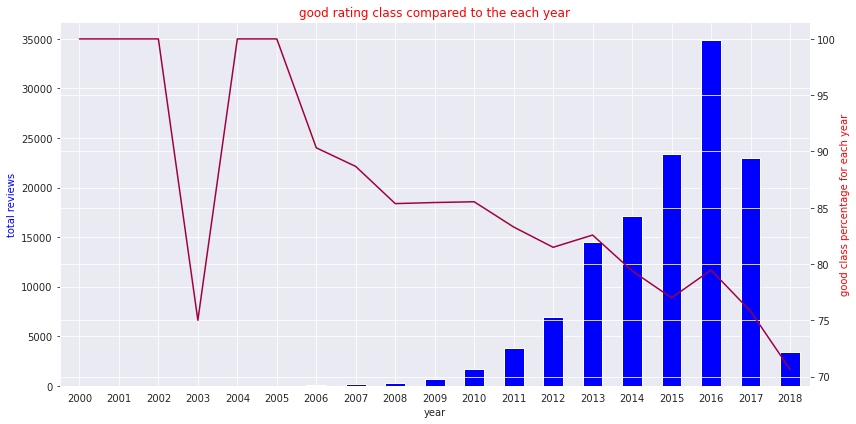

In [ ]:
# create a graph for each rating class to compare within the years
plt.figure(figsize=(12, 8))
fig0, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
feature.set_index(feature['year'], drop=True, inplace=True)
feature['total_reviews'].plot(kind='bar', stacked=True, ax=ax1, colormap='winter', rot=0)
feature['rating_class_num_mean'].plot(use_index=False,
                                      kind='line', ax=ax2, colormap='Spectral')

plt.title('good rating class compared to the each year', color='r')
ax1.set_xlabel('year')
ax1.yaxis.label.set_color('blue')
ax1.set_ylabel('total reviews')
ax2.set_ylabel('good class percentage for each year')
ax2.yaxis.label.set_color('red')
plt.tight_layout()
plt.show()

# ~59

In [ ]:
df3 = df.drop(df[(df['review_length'] > 100) & (df['rating_class'] == 'good')].index)

In [ ]:
df4 = df3.drop(df3[(df3['year'] < 2015)].index)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66037 entries, 3 to 130131
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   overall            66037 non-null  float64       
 1   vote               66037 non-null  int64         
 2   verified           66037 non-null  bool          
 3   reviewer_id        66037 non-null  object        
 4   asin               66037 non-null  object        
 5   style              66037 non-null  object        
 6   reviewer_name      66035 non-null  object        
 7   unix_review_time   66037 non-null  int64         
 8   category           66037 non-null  object        
 9   description        66037 non-null  object        
 10  title              66037 non-null  object        
 11  brand              65843 non-null  object        
 12  rank               66037 non-null  object        
 13  main_cat           65816 non-null  object        
 14  price

In [ ]:
df['review_length'].describe()

count    130133.000000
mean         90.192472
std         103.686831
min           2.000000
25%          35.000000
50%          61.000000
75%         109.000000
max        4280.000000
Name: review_length, dtype: float64

In [ ]:
# create a new dataframe with clean text and rating class number
df5 = df4[['clean_text', 'rating_class_num']].reset_index()
df5.head(10)

,index,clean_text,rating_class_num
0,3,ok read specifications not like really like mo...,0
1,4,great chefs chef look book jot quick ideas ins...,1
2,5,great journal thing mark previous great journa...,1
3,6,perfect nice recipe keeper good kitchen use wa...,1
4,7,nice idea paper quality may issue big fan mole...,1
5,11,great motivation buy moleskine wellness journa...,1
6,12,journal great expect elastic strap journal gre...,1
7,13,ohh love recipe book ohh love recipe book exci...,1
8,23,nice layout not enough space recipe book would...,0
9,24,great idea moleskine great idea moleskine alph...,1


In [ ]:
# initialize the countervectorizer
countVec = CountVectorizer(ngram_range=(1, 2), binary=True)

In [ ]:
# fit the clean_text to countvectorizer
countVec.fit(df5['clean_text'])

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
# transform the matrix
transformed_matrix = countVec.transform(df5['clean_text'])

In [ ]:
# convert matrix to array
transformed_matrix.toarray()